# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [86]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [87]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [88]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [89]:
list_movie = soup.find("div", attrs={"class","lister-list"})
print(type(list_movie))
print(len(list_movie))

<class 'bs4.element.Tag'>
101


Do the scrapping process here (please change this markdown with your explanation)

In [90]:
temp = [] #initiating a tuple
for i in range (50):
#insert the scrapping process here   
    tab = list_movie.find_all("h3")[i]
    judul_film = tab.find_all("a")[0].text
    judul_film = judul_film.strip()
    tahun = list_movie.h3.find('span', class_ = "lister-item-year").text
    imdb_rating = list_movie.find_all("strong")[i].text
    metascore = soup.select(".ratings-bar , .ratings-metascore")
    metascore = [title.text for title in metascore]
    metascore = metascore[i].strip()
    metascore = metascore.replace(metascore[:59],"")
    metascore = metascore[6:8]
    votes = soup.select(".sort-num_votes-visible span:nth-child(2)")
    votes = [title.text for title in votes]
    votes = votes[i].replace(",","")
    temp.append((judul_film,tahun,imdb_rating,metascore,votes))
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [91]:
import pandas as pd
df = pd.DataFrame(temp, columns = ("Judul","tahun","IMDB Rating","Metascore","Votes"))

In [92]:
#insert data wrangling here
df["Judul"] = df["Judul"].astype("category")
df["tahun"] = df["tahun"].astype("category").replace("– ","")
df["IMDB Rating"] = df["IMDB Rating"].astype("float64")
df["IMDB Rating"] = df["IMDB Rating"].replace("– ","")
df["Metascore"] = df["Metascore"].replace("",0)
df["Metascore"] = df["Metascore"].astype("float64")
df["Votes"] = df["Votes"].astype("float64")
rank_film = df.sort_values('IMDB Rating', ascending=False).head(7) #rank by IMDB Rating
rank_film
#end of data wranggling

,Judul,tahun,IMDB Rating,Metascore,Votes
29,Chernobyl,(2019– ),9.4,0.0,548660.0
49,The Mandalorian,(2019– ),8.8,0.0,297227.0
17,Yakusoku no Neverland,(2019– ),8.7,0.0,22599.0
47,The Boys,(2019– ),8.7,0.0,251820.0
22,Demon Slayer: Kimetsu No Yaiba,(2019– ),8.7,0.0,29819.0
40,Gisaengchung,(2019– ),8.6,82.0,571832.0
46,Avengers: Endgame,(2019– ),8.4,78.0,827952.0


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [93]:
df.describe()

,IMDB Rating,Metascore,Votes
count,50.000000,50.000000,50.000000
mean,7.560000,20.080000,196726.500000
std,1.040212,32.415567,219782.507299
min,3.400000,0.000000,2014.000000
25%,7.150000,0.000000,30573.750000
50%,7.750000,0.000000,128064.000000
75%,8.275000,47.750000,302233.000000
max,9.400000,96.000000,958088.000000


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [98]:
top_film = rank_film.set_index('Judul').sort_values(['IMDB Rating','Votes'], ascending=False).head(7)
top_film

,tahun,IMDB Rating,Metascore,Votes
Judul,,,,
Chernobyl,(2019– ),9.4,0.0,548660.0
The Mandalorian,(2019– ),8.8,0.0,297227.0
The Boys,(2019– ),8.7,0.0,251820.0
Demon Slayer: Kimetsu No Yaiba,(2019– ),8.7,0.0,29819.0
Yakusoku no Neverland,(2019– ),8.7,0.0,22599.0
Gisaengchung,(2019– ),8.6,82.0,571832.0
Avengers: Endgame,(2019– ),8.4,78.0,827952.0


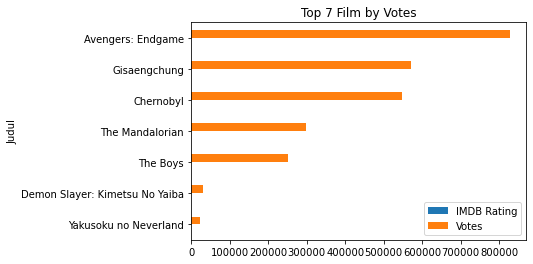

In [104]:
plot = top_film[['IMDB Rating','Votes']].sort_values("Votes").plot.barh(title='Top 7 Film by Votes')

Berikut list top 7 film sort by votes tahun 2019
- Avengers: Endgame
- Gisaengchung
- Chernobyl
- The Mandalorian
- The Boys
- Demon Slayer: Kimetsu No Yaiba
- Yakusoku no Neverland


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.